In [1]:
import duckdb
import pandas as pd
import requests
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns



## Import Diamonds data from database

In [2]:
path = "../data/diamonds_train.db"
conn = duckdb.connect(path, read_only=True)
df = conn.execute('show tables').fetch_df()
df

,name
0,diamonds_city
1,diamonds_clarity
2,diamonds_color
3,diamonds_cut
4,diamonds_dimensions
5,diamonds_properties
6,diamonds_transactional
7,sqlite_autoindex_diamonds_city_1
8,sqlite_autoindex_diamonds_clarity_1
9,sqlite_autoindex_diamonds_color_1


In [3]:
df1 = []

In [4]:
for i, row in df.iterrows():
    df1.append(conn.execute('SELECT * FROM ' + row[0]).fetch_df())
    if (i > 5):
        break
    print('\n')

In [5]:

my_df = conn.execute('SELECT dt.price ,dt.carat, dc.city,  dd."depth", dd."table" ,dd.x , dd.y , dd.z, dc2.clarity , dc3.color , dc4.cut  FROM diamonds_transactional dt INNER JOIN diamonds_properties dp ON dt.index_id = dp.index_id INNER JOIN diamonds_dimensions dd  ON dd.index_id = dt.index_id INNER JOIN diamonds_city dc ON dc.city_id = dt.city_id INNER JOIN diamonds_clarity dc2 ON dc2.clarity_id = dp.clarity_id INNER JOIN diamonds_color dc3 ON dc3.color_id = dp.color_id INNER JOIN diamonds_cut dc4 ON dc4.cut_id = dp.cut_id ').fetch_df()

In [6]:
my_df

,price,carat,city,depth,table,x,y,z,clarity,color,cut
0,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,VS2,H,Very Good
1,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,VS1,G,Fair
2,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,SI1,D,Good
3,9057,1.52,Tel Aviv,61.2,57.0,7.45,7.39,4.54,SI2,F,Ideal
4,557,0.31,Zurich,61.8,54.2,4.33,4.37,2.69,VS1,H,Ideal
...,...,...,...,...,...,...,...,...,...,...,...
40450,1116,0.35,Amsterdam,62.2,58.0,4.52,4.45,2.79,IF,G,Premium
40451,975,0.40,Luxembourg,62.4,55.0,4.74,4.71,2.95,VS2,E,Ideal
40452,8572,1.57,Tel Aviv,61.1,61.0,7.46,7.43,4.55,SI2,G,Premium
40453,5154,0.73,Paris,61.4,56.0,5.80,5.81,3.56,VVS1,F,Ideal


## Data Visualization

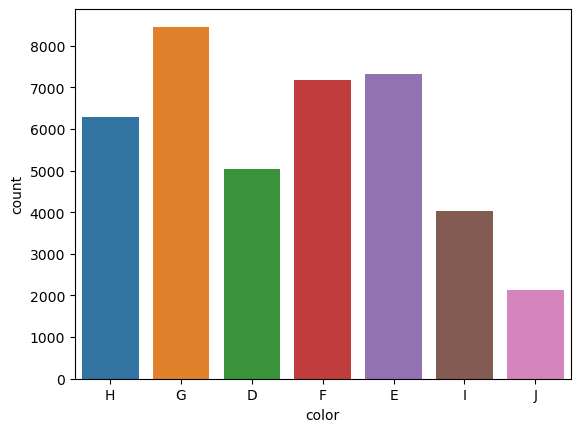

In [7]:
ax = sns.countplot(x="color", data=my_df)

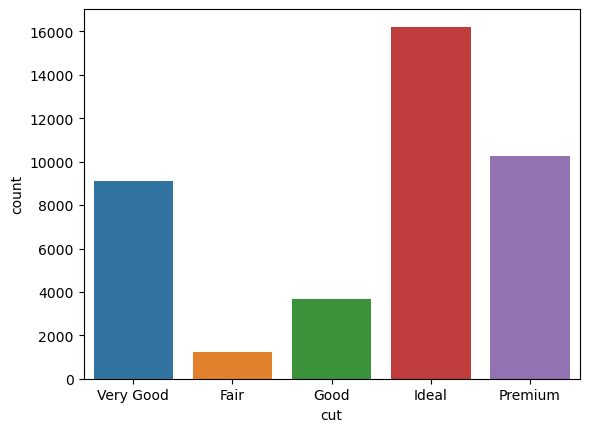

In [8]:
ax = sns.countplot(x="cut", data=my_df)

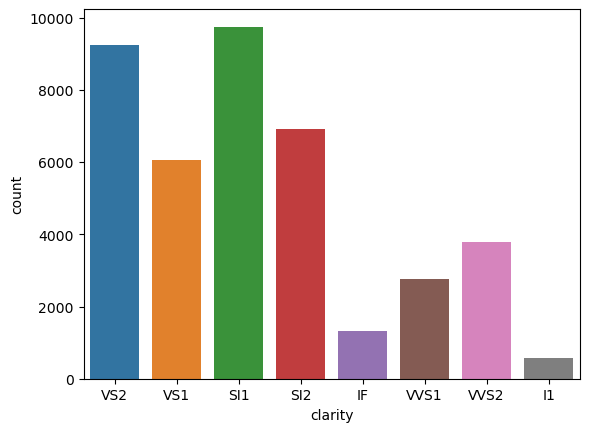

In [9]:
ax = sns.countplot(x="clarity", data=my_df)

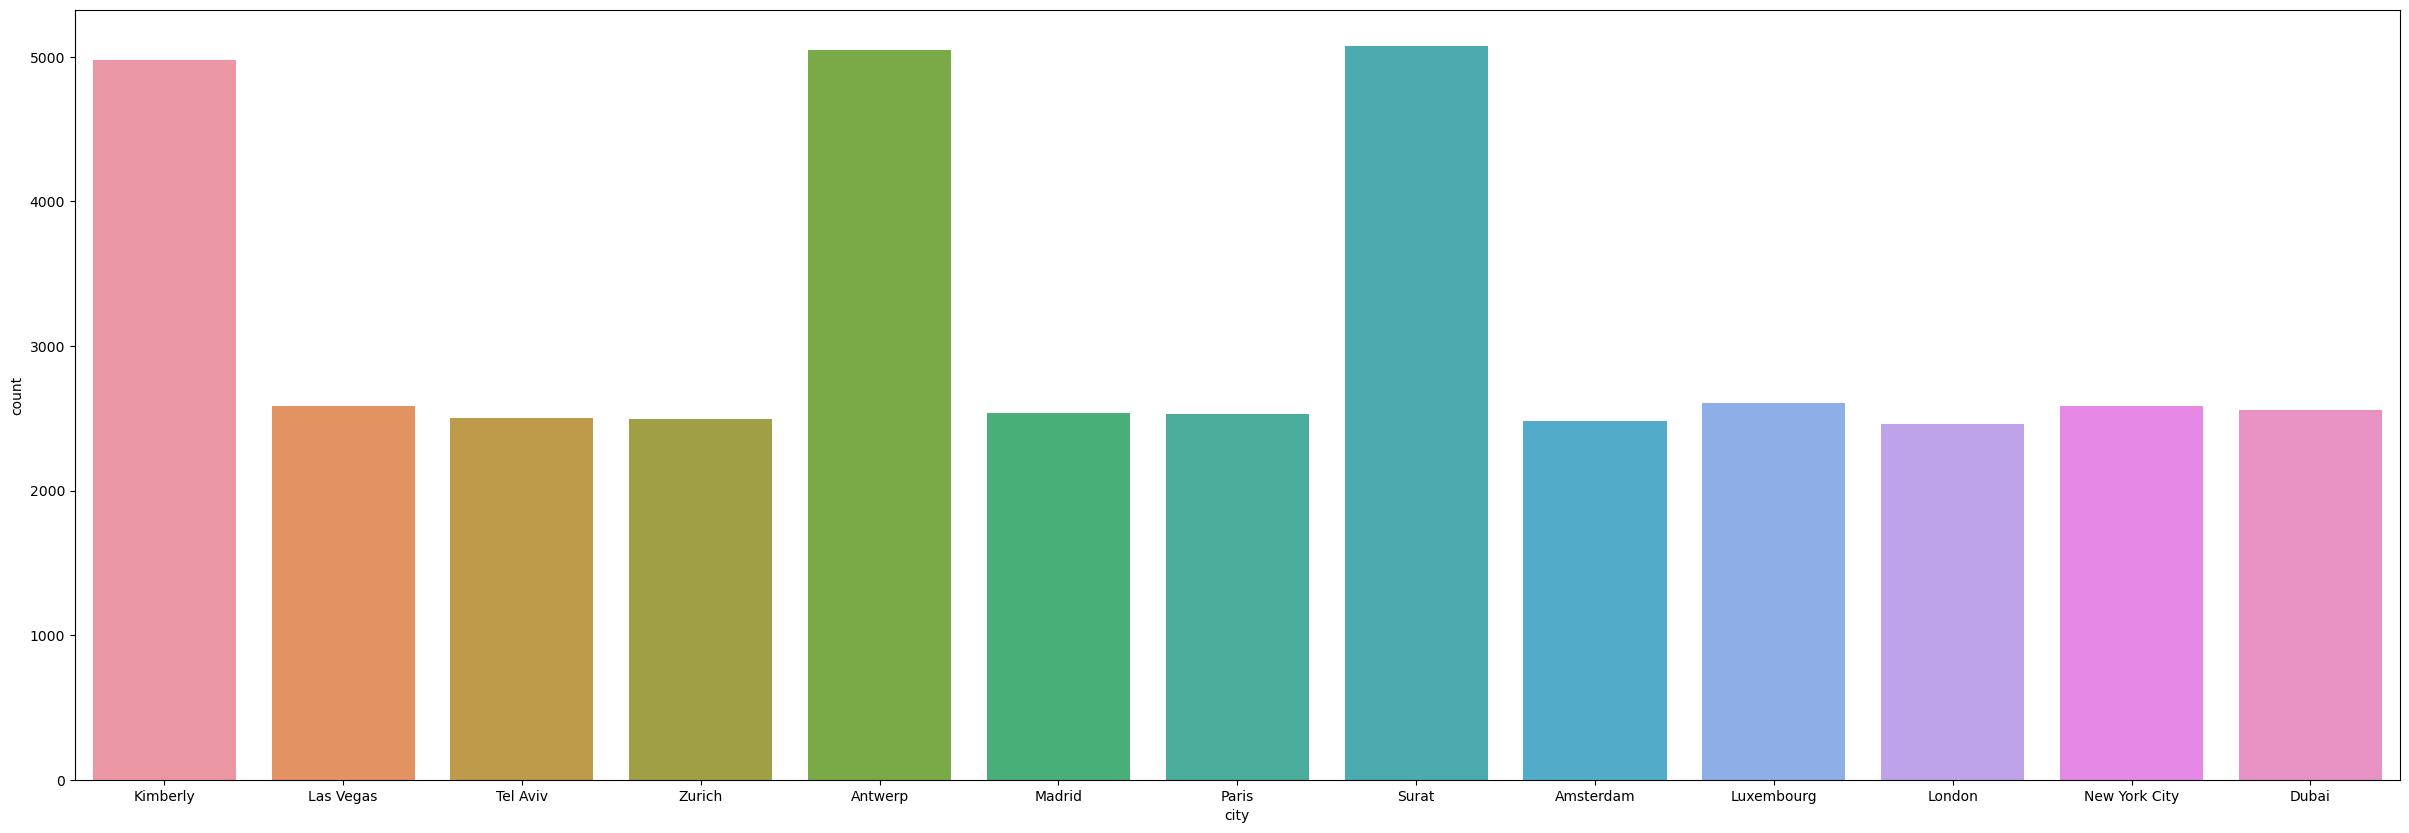

In [10]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x="city", data=my_df)

<Axes: xlabel='color', ylabel='price'>

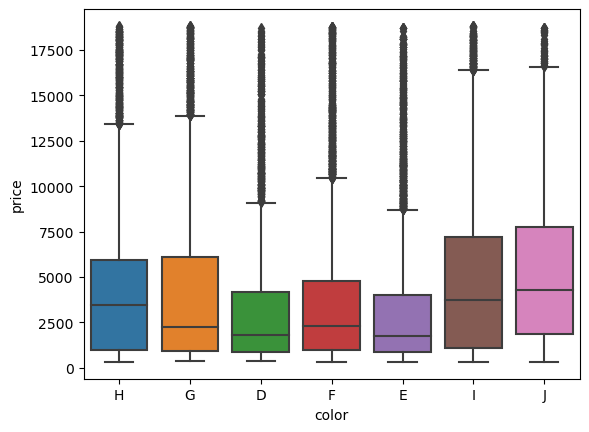

In [11]:
sns.boxplot(data=my_df, x="color", y="price")

<Axes: xlabel='color', ylabel='price'>

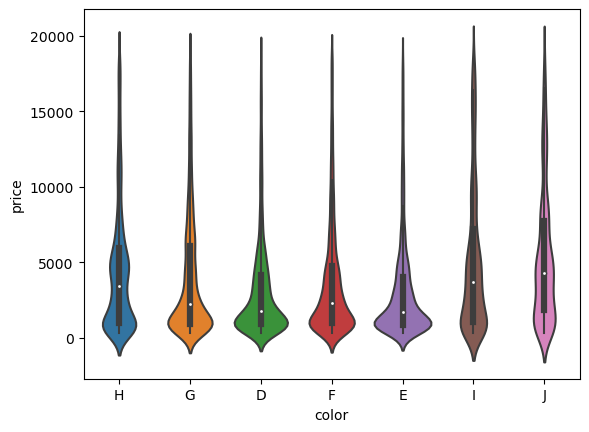

In [12]:
sns.violinplot(data=my_df, x="color", y="price")

<Axes: xlabel='clarity', ylabel='price'>

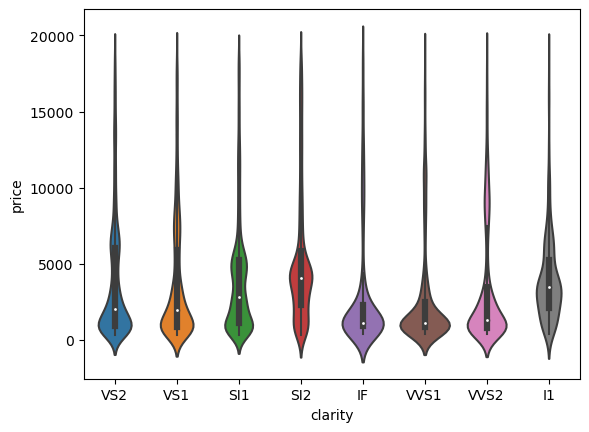

In [13]:
sns.violinplot(data=my_df, x="clarity", y="price")

<Axes: xlabel='cut', ylabel='price'>

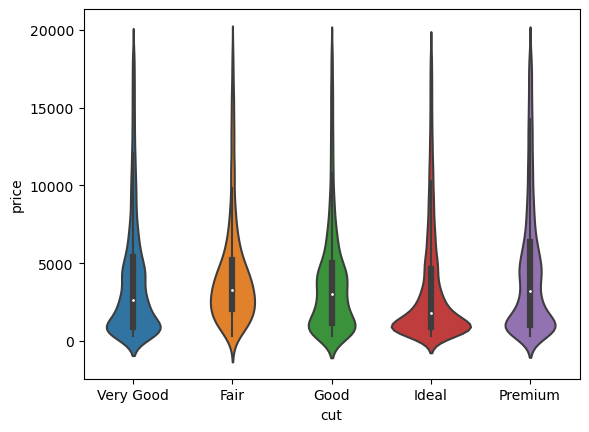

In [14]:
sns.violinplot(data=my_df, x="cut", y="price")

<Axes: >

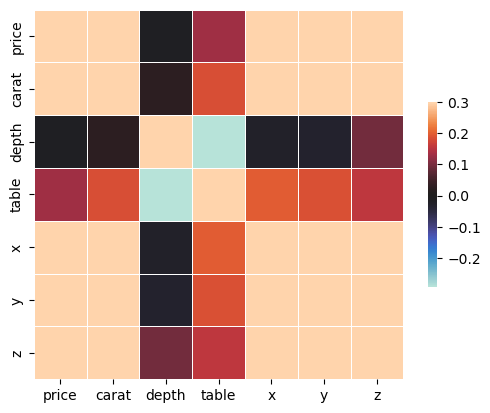

In [15]:
sns.heatmap(my_df.corr(numeric_only=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
my_df

,price,carat,city,depth,table,x,y,z,clarity,color,cut
0,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,VS2,H,Very Good
1,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,VS1,G,Fair
2,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,SI1,D,Good
3,9057,1.52,Tel Aviv,61.2,57.0,7.45,7.39,4.54,SI2,F,Ideal
4,557,0.31,Zurich,61.8,54.2,4.33,4.37,2.69,VS1,H,Ideal
...,...,...,...,...,...,...,...,...,...,...,...
40450,1116,0.35,Amsterdam,62.2,58.0,4.52,4.45,2.79,IF,G,Premium
40451,975,0.40,Luxembourg,62.4,55.0,4.74,4.71,2.95,VS2,E,Ideal
40452,8572,1.57,Tel Aviv,61.1,61.0,7.46,7.43,4.55,SI2,G,Premium
40453,5154,0.73,Paris,61.4,56.0,5.80,5.81,3.56,VVS1,F,Ideal


In [17]:
my_df[my_df['x'] == 0]

,price,carat,city,depth,table,x,y,z,clarity,color,cut
7806,2130,0.71,Madrid,64.1,60.0,0.0,0.00,0.0,SI2,F,Good
14729,4954,1.07,Kimberly,61.6,56.0,0.0,6.62,0.0,SI2,F,Ideal
26030,18034,2.25,Kimberly,62.8,59.0,0.0,0.00,0.0,SI2,H,Premium
28608,2130,0.71,Kimberly,64.1,60.0,0.0,0.00,0.0,SI2,F,Good
34336,6381,1.14,Antwerp,57.5,67.0,0.0,0.00,0.0,VS1,G,Fair


In [18]:
my_df[my_df['y'] == 0]

,price,carat,city,depth,table,x,y,z,clarity,color,cut
7806,2130,0.71,Madrid,64.1,60.0,0.0,0.0,0.0,SI2,F,Good
26030,18034,2.25,Kimberly,62.8,59.0,0.0,0.0,0.0,SI2,H,Premium
28608,2130,0.71,Kimberly,64.1,60.0,0.0,0.0,0.0,SI2,F,Good
34336,6381,1.14,Antwerp,57.5,67.0,0.0,0.0,0.0,VS1,G,Fair


In [19]:
my_df[my_df['z'] == 0]

,price,carat,city,depth,table,x,y,z,clarity,color,cut
1187,3837,1.01,New York City,59.2,58.0,6.50,6.47,0.0,SI2,F,Premium
3474,18207,2.02,Madrid,62.7,53.0,8.02,7.95,0.0,VS2,H,Premium
7806,2130,0.71,Madrid,64.1,60.0,0.00,0.00,0.0,SI2,F,Good
13546,18788,2.80,Kimberly,63.8,58.0,8.90,8.85,0.0,SI2,G,Good
14729,4954,1.07,Kimberly,61.6,56.0,0.00,6.62,0.0,SI2,F,Ideal
14796,12631,2.18,Surat,59.4,61.0,8.49,8.45,0.0,SI2,H,Premium
16411,17265,2.20,Surat,61.2,59.0,8.42,8.37,0.0,SI1,H,Premium
19663,3142,1.00,Madrid,59.1,59.0,6.55,6.48,0.0,SI2,G,Premium
21437,5564,1.15,New York City,59.2,56.0,6.88,6.83,0.0,VS2,G,Ideal
24768,3696,1.10,Dubai,63.0,59.0,6.50,6.47,0.0,SI2,G,Premium


In [25]:
my_df.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


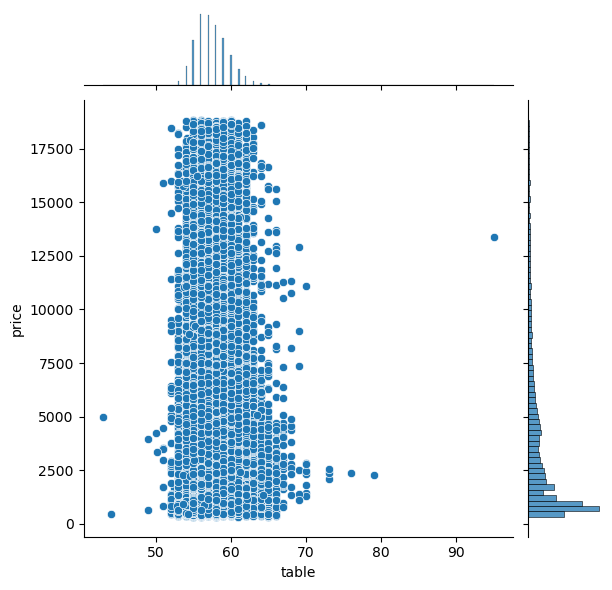

In [28]:
sns.jointplot(data=my_df, x="table", y="price")

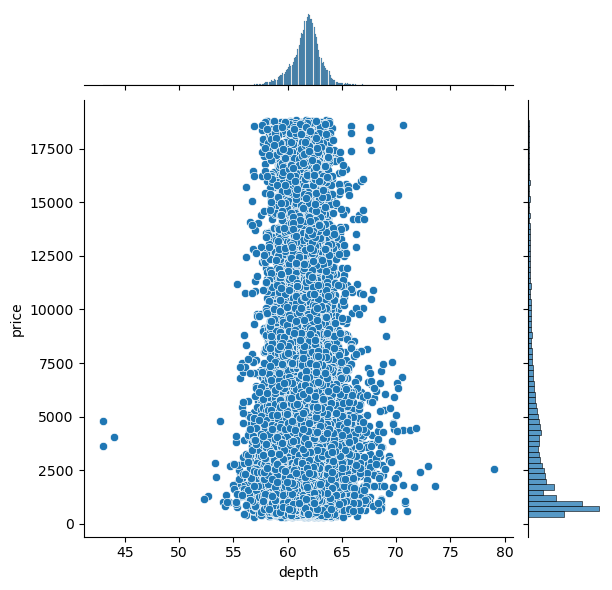

In [29]:
sns.jointplot(data=my_df, x="depth", y="price")

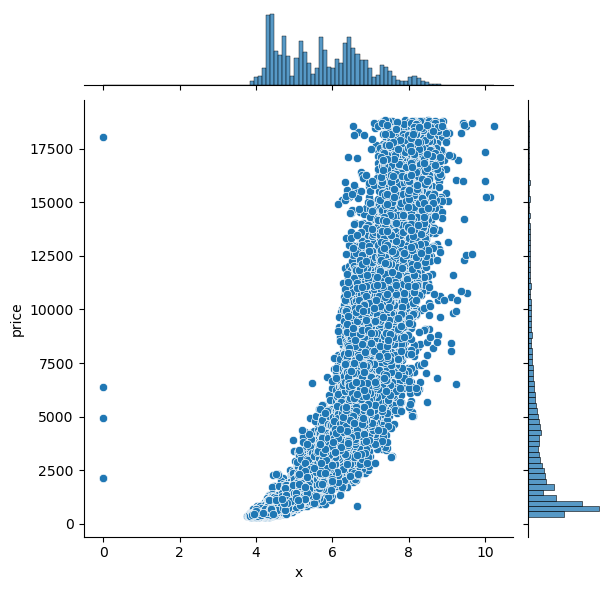

In [30]:
sns.jointplot(data=my_df, x="x", y="price")

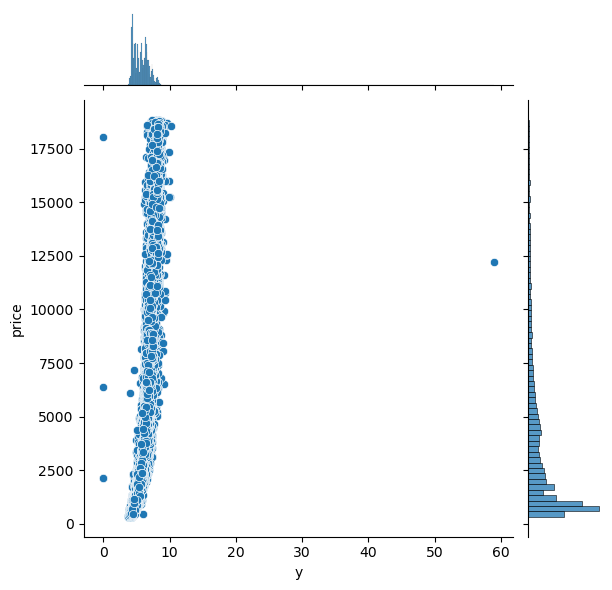

In [31]:
sns.jointplot(data=my_df, x="y", y="price")

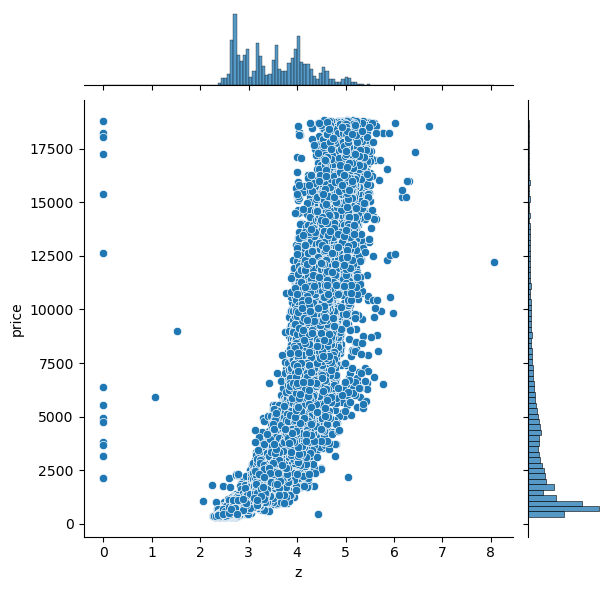

In [33]:
sns.jointplot(data=my_df, x="z", y="price")

In [ ]:
my_df.to_csv("../data/tests/df_baseline.csv")